
=== Model Statistics ===
Number of vertices: 220141
Number of faces: 431544
Total surface area: 58.80
Volume: 28.32
Is watertight: False
Is oriented: True

Bounding Box Dimensions:
X: 3.45
Y: 6.16
Z: 5.71


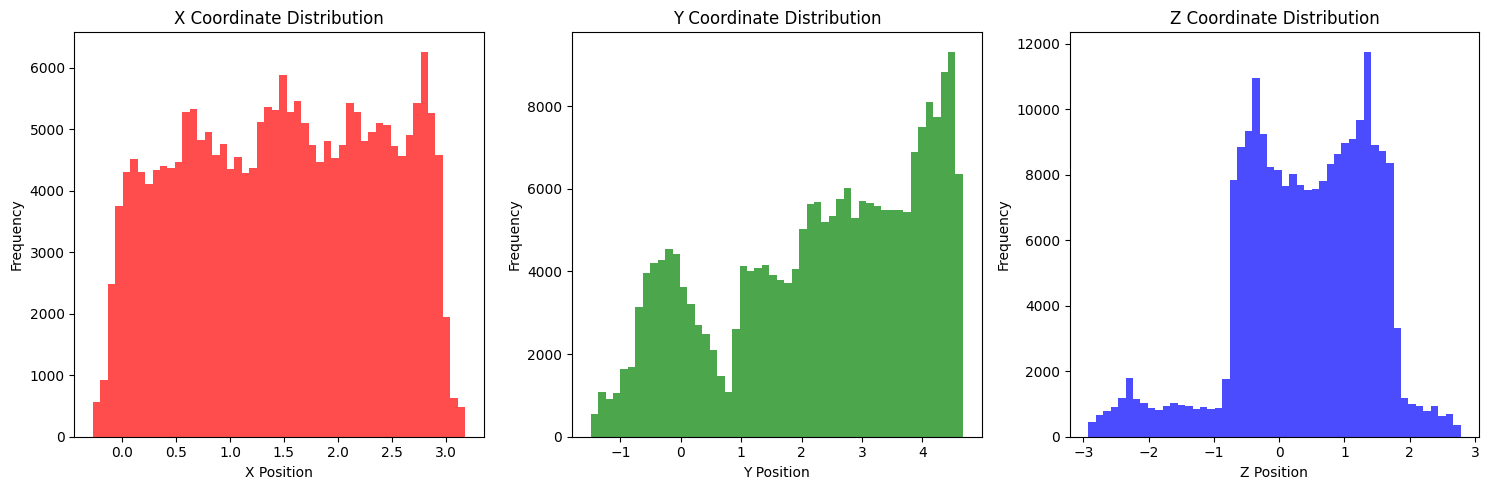

<ipython-input-8-ddf59283c427>:50: RuntimeWarning: invalid value encountered in scalar divide
  angle = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
<ipython-input-8-ddf59283c427>:50: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))


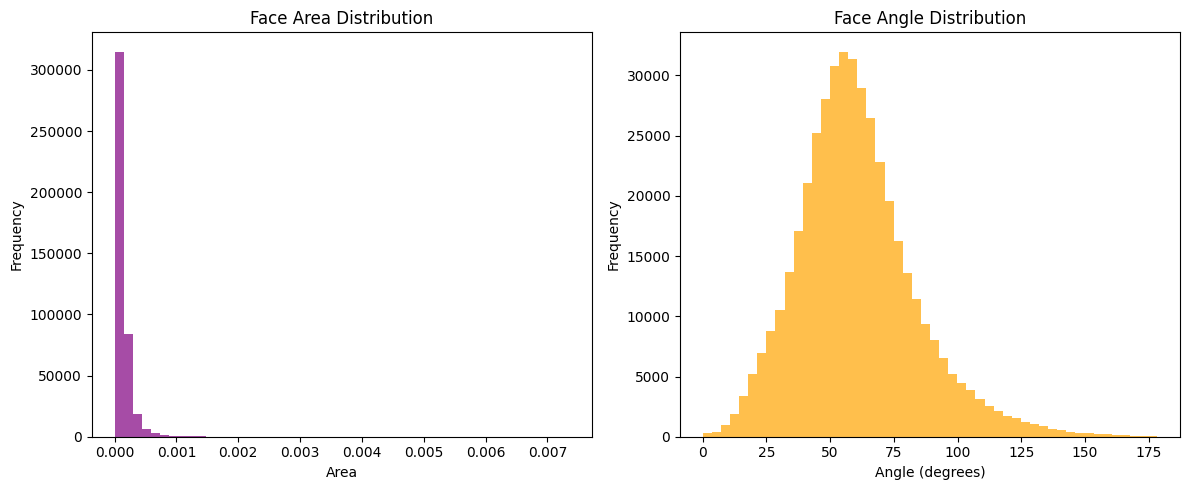

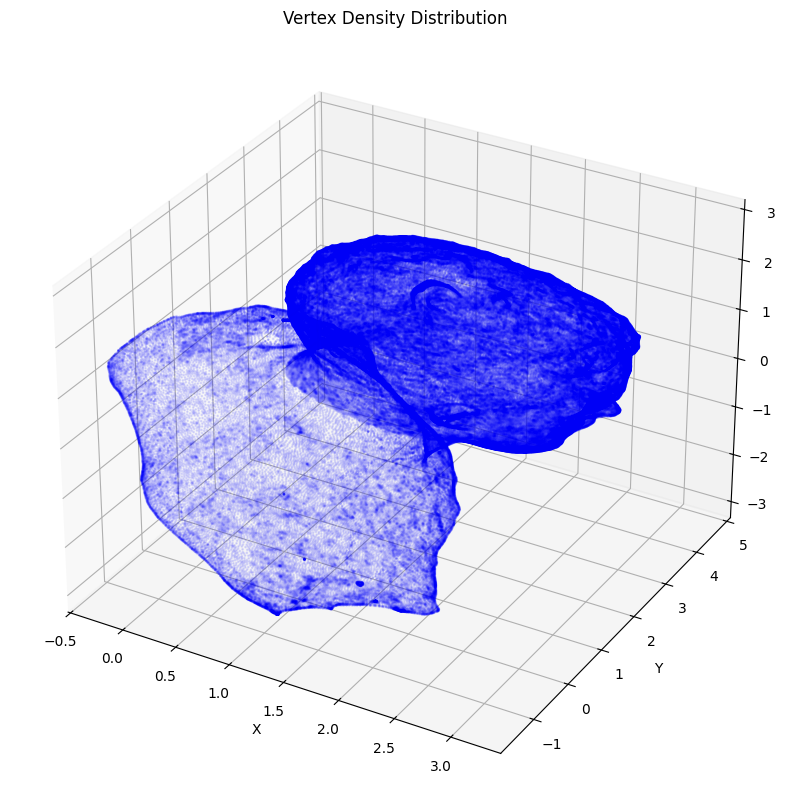

In [ ]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class ModelAnalyzer:
    def __init__(self, model_path):
        self.mesh = trimesh.load(model_path)

    def plot_vertex_histograms(self):
        """Plot histograms of vertex coordinates"""
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

        # X coordinates histogram
        ax1.hist(self.mesh.vertices[:, 0], bins=50, color='red', alpha=0.7)
        ax1.set_title('X Coordinate Distribution')
        ax1.set_xlabel('X Position')
        ax1.set_ylabel('Frequency')

        # Y coordinates histogram
        ax2.hist(self.mesh.vertices[:, 1], bins=50, color='green', alpha=0.7)
        ax2.set_title('Y Coordinate Distribution')
        ax2.set_xlabel('Y Position')
        ax2.set_ylabel('Frequency')

        # Z coordinates histogram
        ax3.hist(self.mesh.vertices[:, 2], bins=50, color='blue', alpha=0.7)
        ax3.set_title('Z Coordinate Distribution')
        ax3.set_xlabel('Z Position')
        ax3.set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    def plot_face_properties(self):
        """Plot histograms of face properties"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        # Calculate face areas
        face_areas = self.mesh.area_faces

        # Calculate face angles
        angles = []
        for face in self.mesh.faces:
            vertices = self.mesh.vertices[face]
            # Calculate vectors
            v1 = vertices[1] - vertices[0]
            v2 = vertices[2] - vertices[0]
            # Calculate angle
            angle = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
            angles.append(np.degrees(angle))

        # Plot histograms
        ax1.hist(face_areas, bins=50, color='purple', alpha=0.7)
        ax1.set_title('Face Area Distribution')
        ax1.set_xlabel('Area')
        ax1.set_ylabel('Frequency')

        ax2.hist(angles, bins=50, color='orange', alpha=0.7)
        ax2.set_title('Face Angle Distribution')
        ax2.set_xlabel('Angle (degrees)')
        ax2.set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    def plot_vertex_density(self):
        """Create a 3D scatter plot showing vertex density"""
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')

        # Plot vertices
        vertices = self.mesh.vertices
        ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],
                  c='blue', alpha=0.1, s=1)

        ax.set_title('Vertex Density Distribution')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        plt.show()

    def print_model_stats(self):
        """Print basic statistics about the model"""
        print("\n=== Model Statistics ===")
        print(f"Number of vertices: {len(self.mesh.vertices)}")
        print(f"Number of faces: {len(self.mesh.faces)}")
        print(f"Total surface area: {self.mesh.area:.2f}")
        print(f"Volume: {self.mesh.volume:.2f}")
        print(f"Is watertight: {self.mesh.is_watertight}")
        print(f"Is oriented: {self.mesh.is_winding_consistent}")

        # Calculate bounding box dimensions
        bounds = np.ptp(self.mesh.vertices, axis=0)
        print("\nBounding Box Dimensions:")
        print(f"X: {bounds[0]:.2f}")
        print(f"Y: {bounds[1]:.2f}")
        print(f"Z: {bounds[2]:.2f}")

def main():
    # Replace 'model.obj' with your 3D model file
    analyzer = ModelAnalyzer('/content/drive/MyDrive/OutputPaper2/pjanic.obj')

    # Print basic statistics
    analyzer.print_model_stats()

    # Generate and display all histograms
    analyzer.plot_vertex_histograms()
    analyzer.plot_face_properties()
    analyzer.plot_vertex_density()

if __name__ == "__main__":
    main()


=== Model Statistics ===
Number of vertices: 12292
Number of faces: 23680
Total surface area: 8.30
Volume: 1.61
Is watertight: False
Is oriented: True

Bounding Box Dimensions:
X: 2.89
Y: 1.55
Z: 3.45


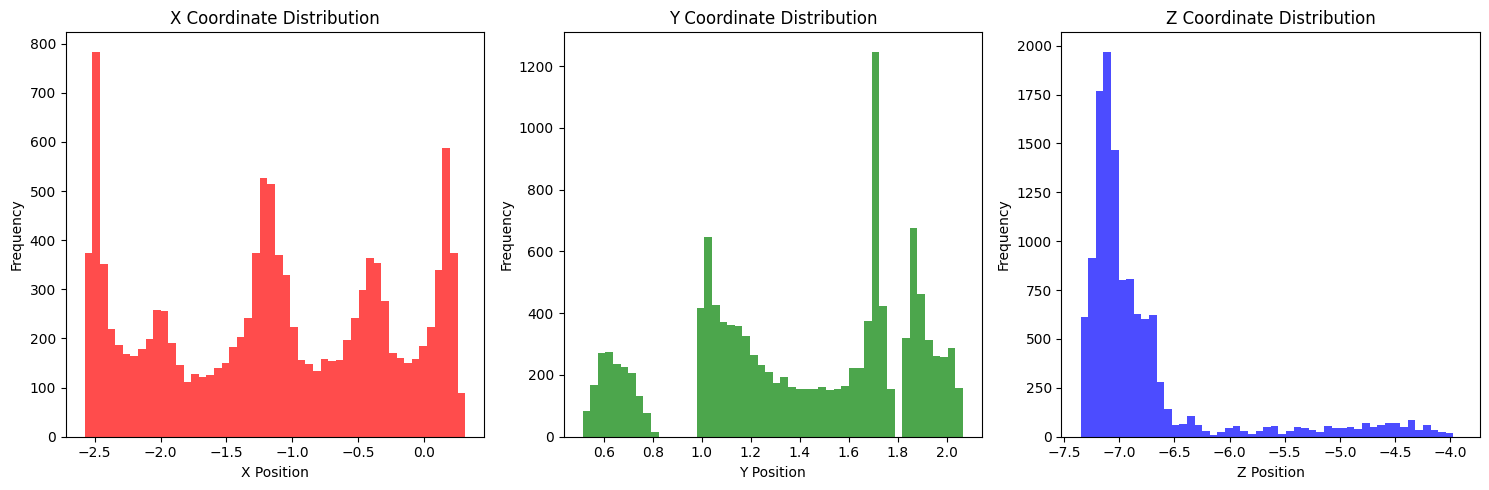

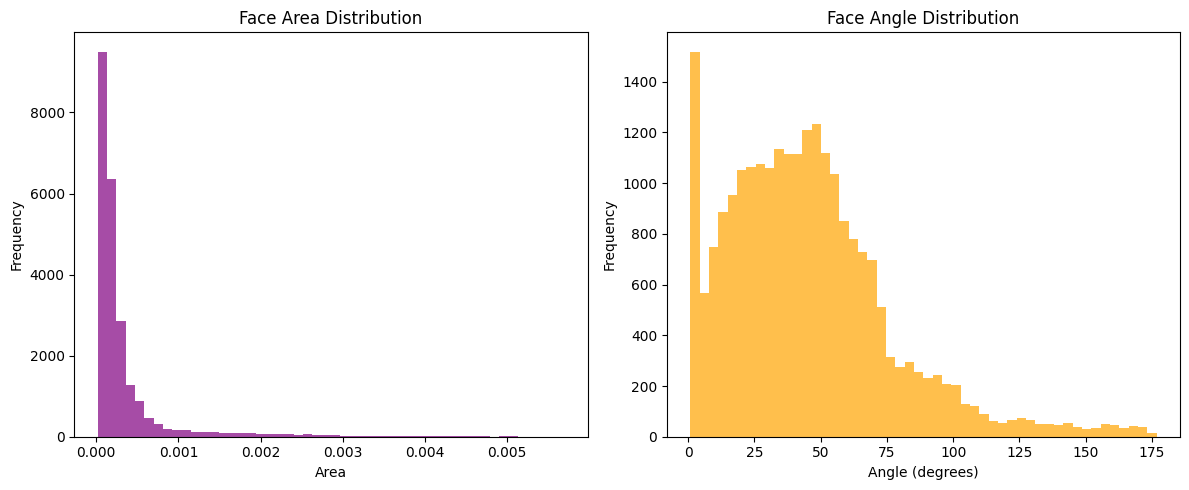

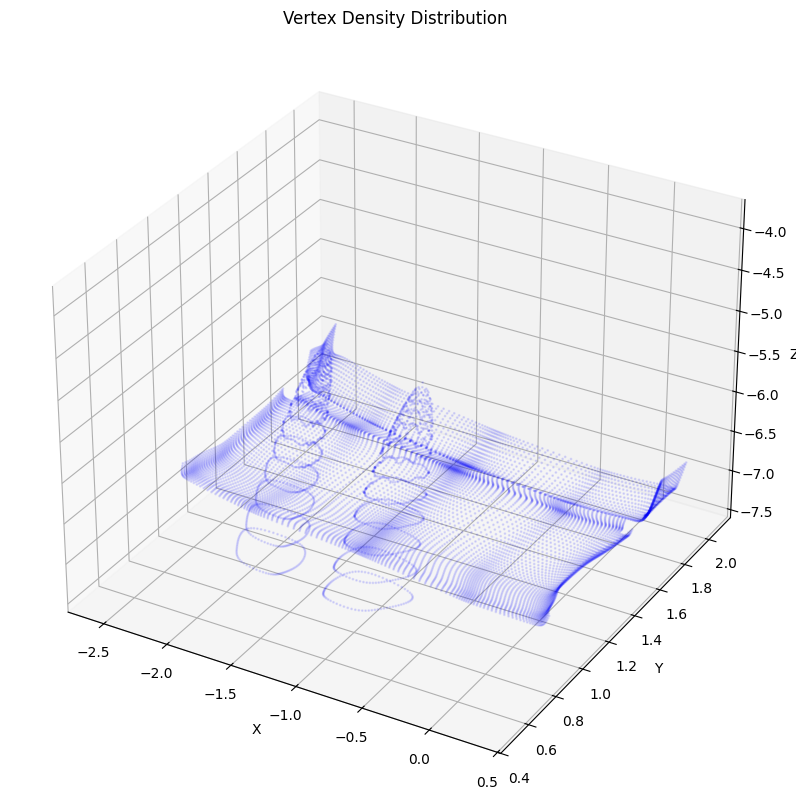

In [ ]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class ModelAnalyzer:
    def __init__(self, model_path):
        # Load the model, and if it's a scene, get the first mesh
        loaded_object = trimesh.load(model_path)
        if isinstance(loaded_object, trimesh.Scene):
            # Assume the first mesh in the scene is the main object
            self.mesh = loaded_object.geometry[list(loaded_object.geometry.keys())[0]]
        else:
            self.mesh = loaded_object

    def plot_vertex_histograms(self):
        """Plot histograms of vertex coordinates"""
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

        # X coordinates histogram
        ax1.hist(self.mesh.vertices[:, 0], bins=50, color='red', alpha=0.7)
        ax1.set_title('X Coordinate Distribution')
        ax1.set_xlabel('X Position')
        ax1.set_ylabel('Frequency')

        # Y coordinates histogram
        ax2.hist(self.mesh.vertices[:, 1], bins=50, color='green', alpha=0.7)
        ax2.set_title('Y Coordinate Distribution')
        ax2.set_xlabel('Y Position')
        ax2.set_ylabel('Frequency')

        # Z coordinates histogram
        ax3.hist(self.mesh.vertices[:, 2], bins=50, color='blue', alpha=0.7)
        ax3.set_title('Z Coordinate Distribution')
        ax3.set_xlabel('Z Position')
        ax3.set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    def plot_face_properties(self):
        """Plot histograms of face properties"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        # Calculate face areas
        face_areas = self.mesh.area_faces

        # Calculate face angles
        angles = []
        for face in self.mesh.faces:
            vertices = self.mesh.vertices[face]
            # Calculate vectors
            v1 = vertices[1] - vertices[0]
            v2 = vertices[2] - vertices[0]
            # Calculate angle
            angle = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
            angles.append(np.degrees(angle))

        # Plot histograms
        ax1.hist(face_areas, bins=50, color='purple', alpha=0.7)
        ax1.set_title('Face Area Distribution')
        ax1.set_xlabel('Area')
        ax1.set_ylabel('Frequency')

        ax2.hist(angles, bins=50, color='orange', alpha=0.7)
        ax2.set_title('Face Angle Distribution')
        ax2.set_xlabel('Angle (degrees)')
        ax2.set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    def plot_vertex_density(self):
        """Create a 3D scatter plot showing vertex density"""
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')

        # Plot vertices
        vertices = self.mesh.vertices
        ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],
                  c='blue', alpha=0.1, s=1)

        ax.set_title('Vertex Density Distribution')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        plt.show()

    def print_model_stats(self):
        """Print basic statistics about the model"""
        print("\n=== Model Statistics ===")
        print(f"Number of vertices: {len(self.mesh.vertices)}")
        print(f"Number of faces: {len(self.mesh.faces)}")
        print(f"Total surface area: {self.mesh.area:.2f}")
        print(f"Volume: {self.mesh.volume:.2f}")
        print(f"Is watertight: {self.mesh.is_watertight}")
        print(f"Is oriented: {self.mesh.is_winding_consistent}")

        # Calculate bounding box dimensions
        bounds = np.ptp(self.mesh.vertices, axis=0)
        print("\nBounding Box Dimensions:")
        print(f"X: {bounds[0]:.2f}")
        print(f"Y: {bounds[1]:.2f}")
        print(f"Z: {bounds[2]:.2f}")

def main():
    # Replace 'model.obj' with your 3D model file
    analyzer = ModelAnalyzer('/content/drive/MyDrive/OutputPaper2/bugatti.obj')

    # Print basic statistics
    analyzer.print_model_stats()

    # Generate and display all histograms
    analyzer.plot_vertex_histograms()
    analyzer.plot_face_properties()
    analyzer.plot_vertex_density()

if __name__ == "__main__":
    main()


=== Model Statistics ===
Number of vertices: 514
Number of faces: 1024
Total surface area: 0.01
Volume: 0.00
Is watertight: True
Is oriented: True

Bounding Box Dimensions:
X: 0.04
Y: 0.06
Z: 0.09


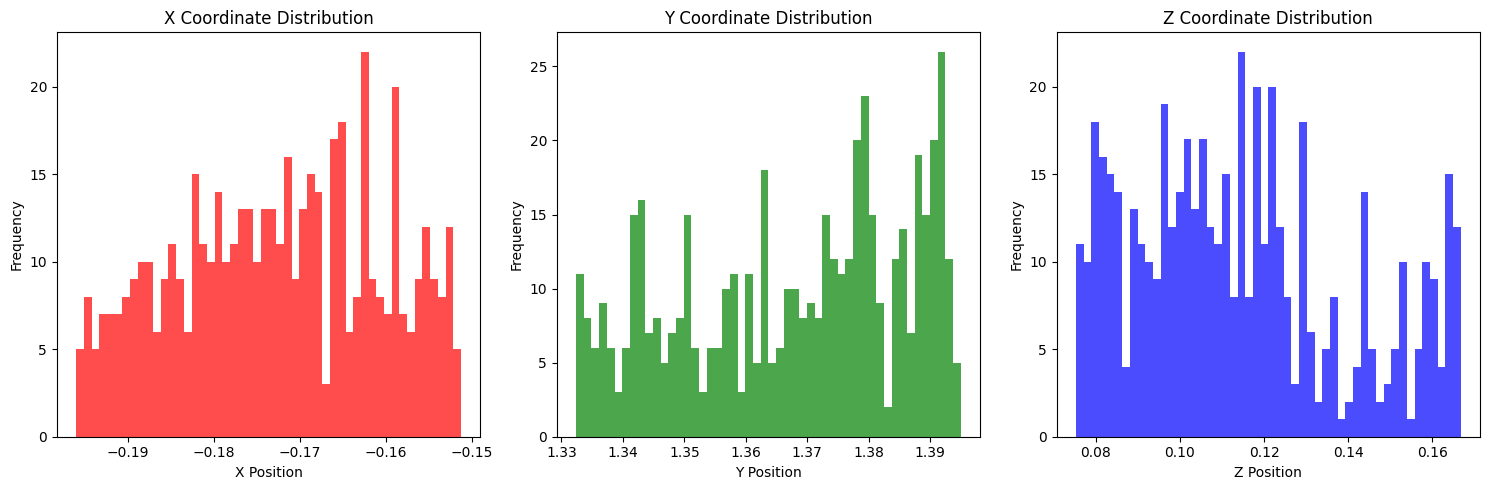

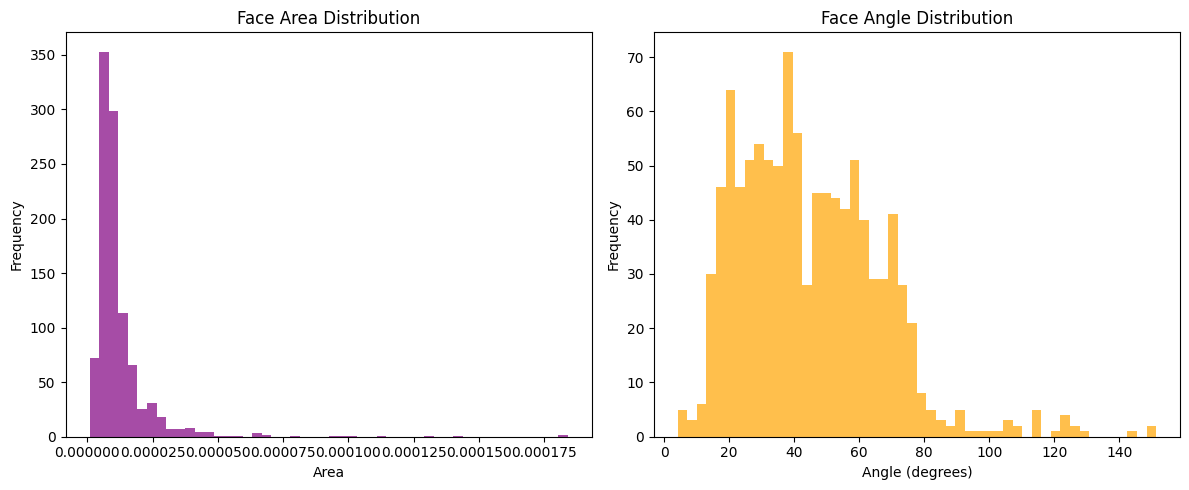

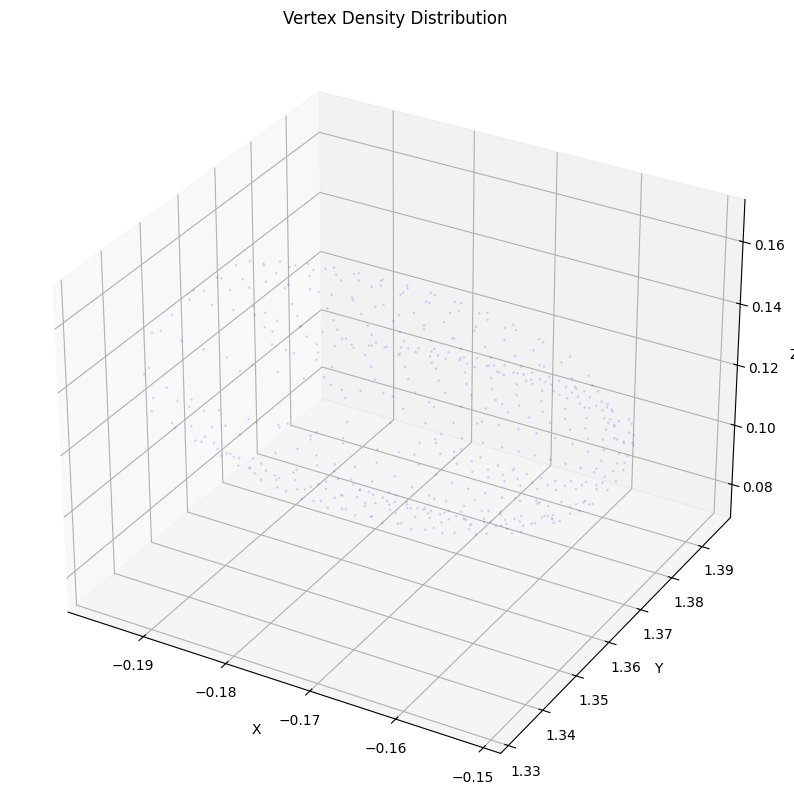

In [ ]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class ModelAnalyzer:
    def __init__(self, model_path):
        # Load the model, and if it's a scene, get the first mesh
        loaded_object = trimesh.load(model_path)
        if isinstance(loaded_object, trimesh.Scene):
            # Assume the first mesh in the scene is the main object
            self.mesh = loaded_object.geometry[list(loaded_object.geometry.keys())[0]]
        else:
            self.mesh = loaded_object

    def plot_vertex_histograms(self):
        """Plot histograms of vertex coordinates"""
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

        # X coordinates histogram
        ax1.hist(self.mesh.vertices[:, 0], bins=50, color='red', alpha=0.7)
        ax1.set_title('X Coordinate Distribution')
        ax1.set_xlabel('X Position')
        ax1.set_ylabel('Frequency')

        # Y coordinates histogram
        ax2.hist(self.mesh.vertices[:, 1], bins=50, color='green', alpha=0.7)
        ax2.set_title('Y Coordinate Distribution')
        ax2.set_xlabel('Y Position')
        ax2.set_ylabel('Frequency')

        # Z coordinates histogram
        ax3.hist(self.mesh.vertices[:, 2], bins=50, color='blue', alpha=0.7)
        ax3.set_title('Z Coordinate Distribution')
        ax3.set_xlabel('Z Position')
        ax3.set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    def plot_face_properties(self):
        """Plot histograms of face properties"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        # Calculate face areas
        face_areas = self.mesh.area_faces

        # Calculate face angles
        angles = []
        for face in self.mesh.faces:
            vertices = self.mesh.vertices[face]
            # Calculate vectors
            v1 = vertices[1] - vertices[0]
            v2 = vertices[2] - vertices[0]
            # Calculate angle
            angle = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
            angles.append(np.degrees(angle))

        # Plot histograms
        ax1.hist(face_areas, bins=50, color='purple', alpha=0.7)
        ax1.set_title('Face Area Distribution')
        ax1.set_xlabel('Area')
        ax1.set_ylabel('Frequency')

        ax2.hist(angles, bins=50, color='orange', alpha=0.7)
        ax2.set_title('Face Angle Distribution')
        ax2.set_xlabel('Angle (degrees)')
        ax2.set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    def plot_vertex_density(self):
        """Create a 3D scatter plot showing vertex density"""
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')

        # Plot vertices
        vertices = self.mesh.vertices
        ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],
                  c='blue', alpha=0.1, s=1)

        ax.set_title('Vertex Density Distribution')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        plt.show()

    def print_model_stats(self):
        """Print basic statistics about the model"""
        print("\n=== Model Statistics ===")
        print(f"Number of vertices: {len(self.mesh.vertices)}")
        print(f"Number of faces: {len(self.mesh.faces)}")
        print(f"Total surface area: {self.mesh.area:.2f}")
        print(f"Volume: {self.mesh.volume:.2f}")
        print(f"Is watertight: {self.mesh.is_watertight}")
        print(f"Is oriented: {self.mesh.is_winding_consistent}")

        # Calculate bounding box dimensions
        bounds = np.ptp(self.mesh.vertices, axis=0)
        print("\nBounding Box Dimensions:")
        print(f"X: {bounds[0]:.2f}")
        print(f"Y: {bounds[1]:.2f}")
        print(f"Z: {bounds[2]:.2f}")

def main():
    # Replace 'model.obj' with your 3D model file
    analyzer = ModelAnalyzer('/content/drive/MyDrive/OutputPaper2/LibertStatue.obj')

    # Print basic statistics
    analyzer.print_model_stats()

    # Generate and display all histograms
    analyzer.plot_vertex_histograms()
    analyzer.plot_face_properties()
    analyzer.plot_vertex_density()

if __name__ == "__main__":
    main()


=== Model Statistics ===
Number of vertices: 1071
Number of faces: 2072
Total surface area: 0.10
Volume: -0.00
Is watertight: False
Is oriented: True

Bounding Box Dimensions:
X: 1.76
Y: 0.05
Z: 0.14


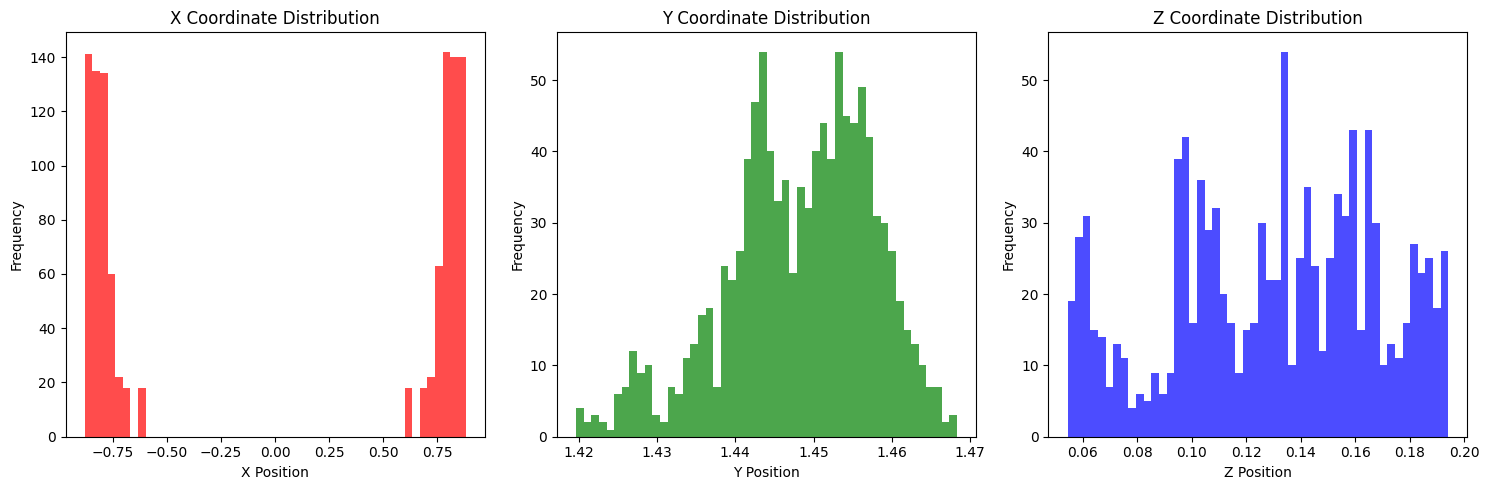

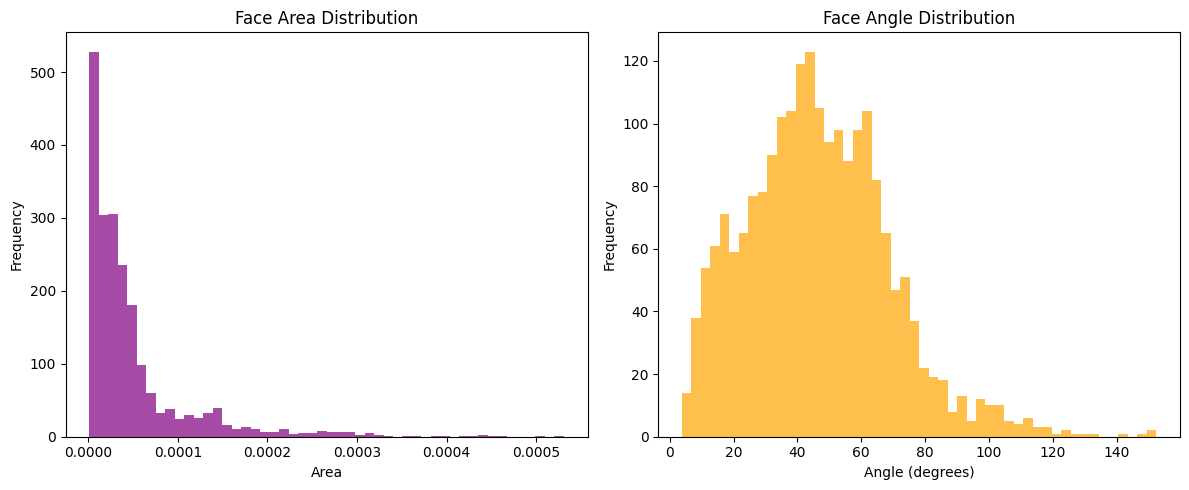

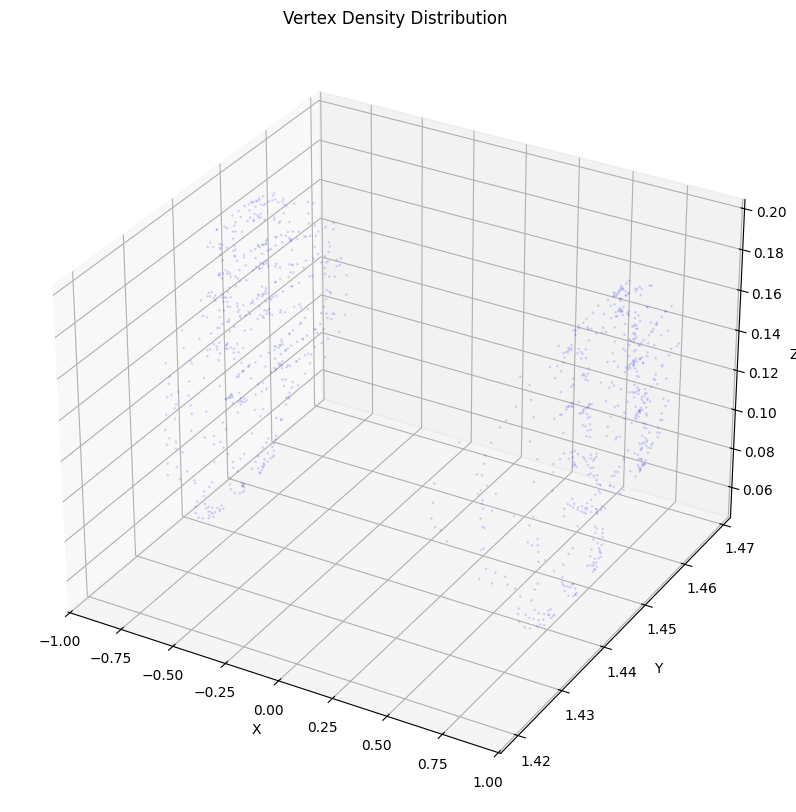

In [ ]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class ModelAnalyzer:
    def __init__(self, model_path):
        # Load the model, and if it's a scene, get the first mesh
        loaded_object = trimesh.load(model_path)
        if isinstance(loaded_object, trimesh.Scene):
            # Assume the first mesh in the scene is the main object
            self.mesh = loaded_object.geometry[list(loaded_object.geometry.keys())[0]]
        else:
            self.mesh = loaded_object

    def plot_vertex_histograms(self):
        """Plot histograms of vertex coordinates"""
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

        # X coordinates histogram
        ax1.hist(self.mesh.vertices[:, 0], bins=50, color='red', alpha=0.7)
        ax1.set_title('X Coordinate Distribution')
        ax1.set_xlabel('X Position')
        ax1.set_ylabel('Frequency')

        # Y coordinates histogram
        ax2.hist(self.mesh.vertices[:, 1], bins=50, color='green', alpha=0.7)
        ax2.set_title('Y Coordinate Distribution')
        ax2.set_xlabel('Y Position')
        ax2.set_ylabel('Frequency')

        # Z coordinates histogram
        ax3.hist(self.mesh.vertices[:, 2], bins=50, color='blue', alpha=0.7)
        ax3.set_title('Z Coordinate Distribution')
        ax3.set_xlabel('Z Position')
        ax3.set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    def plot_face_properties(self):
        """Plot histograms of face properties"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        # Calculate face areas
        face_areas = self.mesh.area_faces

        # Calculate face angles
        angles = []
        for face in self.mesh.faces:
            vertices = self.mesh.vertices[face]
            # Calculate vectors
            v1 = vertices[1] - vertices[0]
            v2 = vertices[2] - vertices[0]
            # Calculate angle
            angle = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
            angles.append(np.degrees(angle))

        # Plot histograms
        ax1.hist(face_areas, bins=50, color='purple', alpha=0.7)
        ax1.set_title('Face Area Distribution')
        ax1.set_xlabel('Area')
        ax1.set_ylabel('Frequency')

        ax2.hist(angles, bins=50, color='orange', alpha=0.7)
        ax2.set_title('Face Angle Distribution')
        ax2.set_xlabel('Angle (degrees)')
        ax2.set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    def plot_vertex_density(self):
        """Create a 3D scatter plot showing vertex density"""
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')

        # Plot vertices
        vertices = self.mesh.vertices
        ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],
                  c='blue', alpha=0.1, s=1)

        ax.set_title('Vertex Density Distribution')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        plt.show()

    def print_model_stats(self):
        """Print basic statistics about the model"""
        print("\n=== Model Statistics ===")
        print(f"Number of vertices: {len(self.mesh.vertices)}")
        print(f"Number of faces: {len(self.mesh.faces)}")
        print(f"Total surface area: {self.mesh.area:.2f}")
        print(f"Volume: {self.mesh.volume:.2f}")
        print(f"Is watertight: {self.mesh.is_watertight}")
        print(f"Is oriented: {self.mesh.is_winding_consistent}")

        # Calculate bounding box dimensions
        bounds = np.ptp(self.mesh.vertices, axis=0)
        print("\nBounding Box Dimensions:")
        print(f"X: {bounds[0]:.2f}")
        print(f"Y: {bounds[1]:.2f}")
        print(f"Z: {bounds[2]:.2f}")

def main():
    # Replace 'model.obj' with your 3D model file
    analyzer = ModelAnalyzer('/content/drive/MyDrive/OutputPaper2/RiggedHand.obj')

    # Print basic statistics
    analyzer.print_model_stats()

    # Generate and display all histograms
    analyzer.plot_vertex_histograms()
    analyzer.plot_face_properties()
    analyzer.plot_vertex_density()

if __name__ == "__main__":
    main()


=== Model Statistics ===
Number of vertices: 66848
Number of faces: 133692
Total surface area: 511.03
Volume: 442.98
Is watertight: True
Is oriented: True

Bounding Box Dimensions:
X: 13.33
Y: 8.04
Z: 20.27


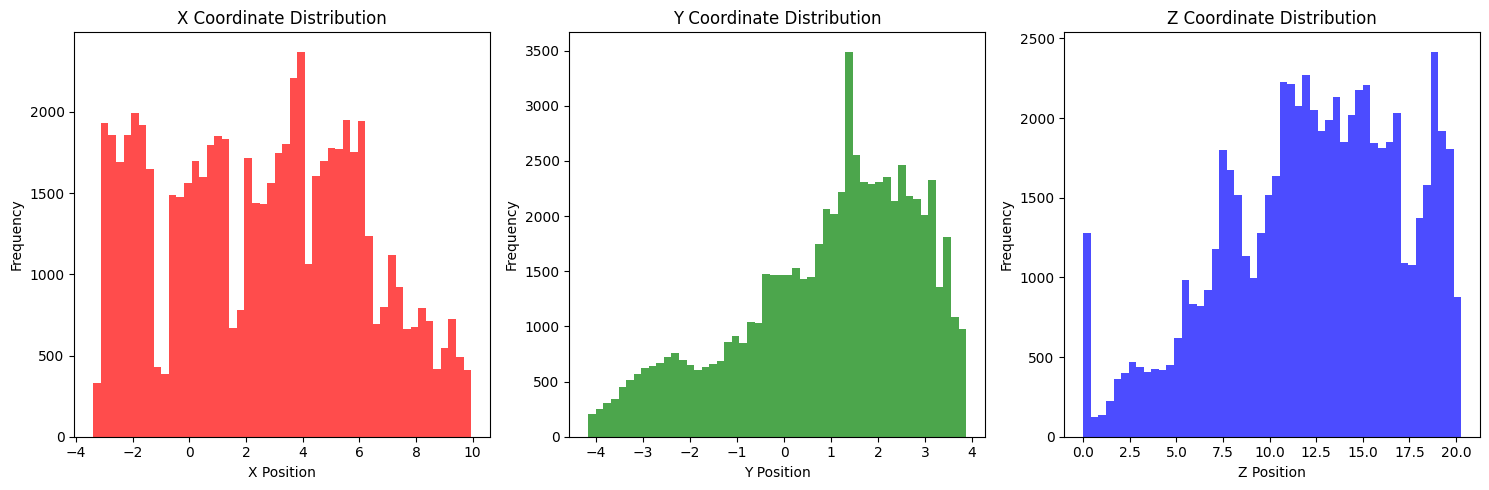

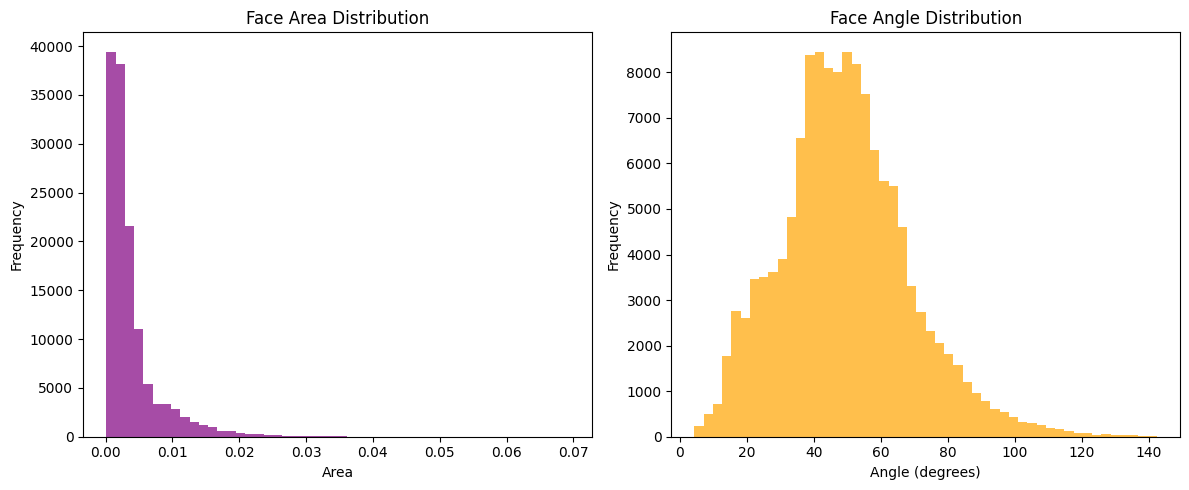

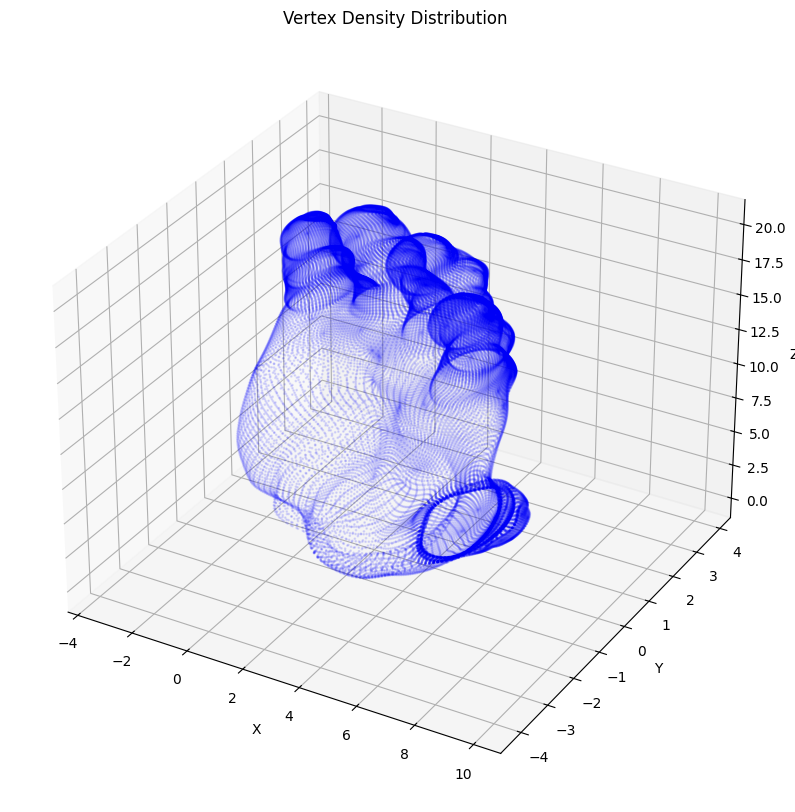

In [ ]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class ModelAnalyzer:
    def __init__(self, model_path):
        # Load the model, and if it's a scene, get the first mesh
        loaded_object = trimesh.load(model_path)
        if isinstance(loaded_object, trimesh.Scene):
            # Assume the first mesh in the scene is the main object
            self.mesh = loaded_object.geometry[list(loaded_object.geometry.keys())[0]]
        else:
            self.mesh = loaded_object

    def plot_vertex_histograms(self):
        """Plot histograms of vertex coordinates"""
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

        # X coordinates histogram
        ax1.hist(self.mesh.vertices[:, 0], bins=50, color='red', alpha=0.7)
        ax1.set_title('X Coordinate Distribution')
        ax1.set_xlabel('X Position')
        ax1.set_ylabel('Frequency')

        # Y coordinates histogram
        ax2.hist(self.mesh.vertices[:, 1], bins=50, color='green', alpha=0.7)
        ax2.set_title('Y Coordinate Distribution')
        ax2.set_xlabel('Y Position')
        ax2.set_ylabel('Frequency')

        # Z coordinates histogram
        ax3.hist(self.mesh.vertices[:, 2], bins=50, color='blue', alpha=0.7)
        ax3.set_title('Z Coordinate Distribution')
        ax3.set_xlabel('Z Position')
        ax3.set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    def plot_face_properties(self):
        """Plot histograms of face properties"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        # Calculate face areas
        face_areas = self.mesh.area_faces

        # Calculate face angles
        angles = []
        for face in self.mesh.faces:
            vertices = self.mesh.vertices[face]
            # Calculate vectors
            v1 = vertices[1] - vertices[0]
            v2 = vertices[2] - vertices[0]
            # Calculate angle
            angle = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
            angles.append(np.degrees(angle))

        # Plot histograms
        ax1.hist(face_areas, bins=50, color='purple', alpha=0.7)
        ax1.set_title('Face Area Distribution')
        ax1.set_xlabel('Area')
        ax1.set_ylabel('Frequency')

        ax2.hist(angles, bins=50, color='orange', alpha=0.7)
        ax2.set_title('Face Angle Distribution')
        ax2.set_xlabel('Angle (degrees)')
        ax2.set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    def plot_vertex_density(self):
        """Create a 3D scatter plot showing vertex density"""
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')

        # Plot vertices
        vertices = self.mesh.vertices
        ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],
                  c='blue', alpha=0.1, s=1)

        ax.set_title('Vertex Density Distribution')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        plt.show()

    def print_model_stats(self):
        """Print basic statistics about the model"""
        print("\n=== Model Statistics ===")
        print(f"Number of vertices: {len(self.mesh.vertices)}")
        print(f"Number of faces: {len(self.mesh.faces)}")
        print(f"Total surface area: {self.mesh.area:.2f}")
        print(f"Volume: {self.mesh.volume:.2f}")
        print(f"Is watertight: {self.mesh.is_watertight}")
        print(f"Is oriented: {self.mesh.is_winding_consistent}")

        # Calculate bounding box dimensions
        bounds = np.ptp(self.mesh.vertices, axis=0)
        print("\nBounding Box Dimensions:")
        print(f"X: {bounds[0]:.2f}")
        print(f"Y: {bounds[1]:.2f}")
        print(f"Z: {bounds[2]:.2f}")

def main():
    # Replace 'model.obj' with your 3D model file
    analyzer = ModelAnalyzer('/content/drive/MyDrive/OutputPaper2/16834_hand_v1_NEW.obj')

    # Print basic statistics
    analyzer.print_model_stats()

    # Generate and display all histograms
    analyzer.plot_vertex_histograms()
    analyzer.plot_face_properties()
    analyzer.plot_vertex_density()

if __name__ == "__main__":
    main()


=== Model Statistics ===
Number of vertices: 17961
Number of faces: 35772
Total surface area: 748.71
Volume: 485.02
Is watertight: False
Is oriented: True

Bounding Box Dimensions:
X: 12.46
Y: 8.76
Z: 26.98


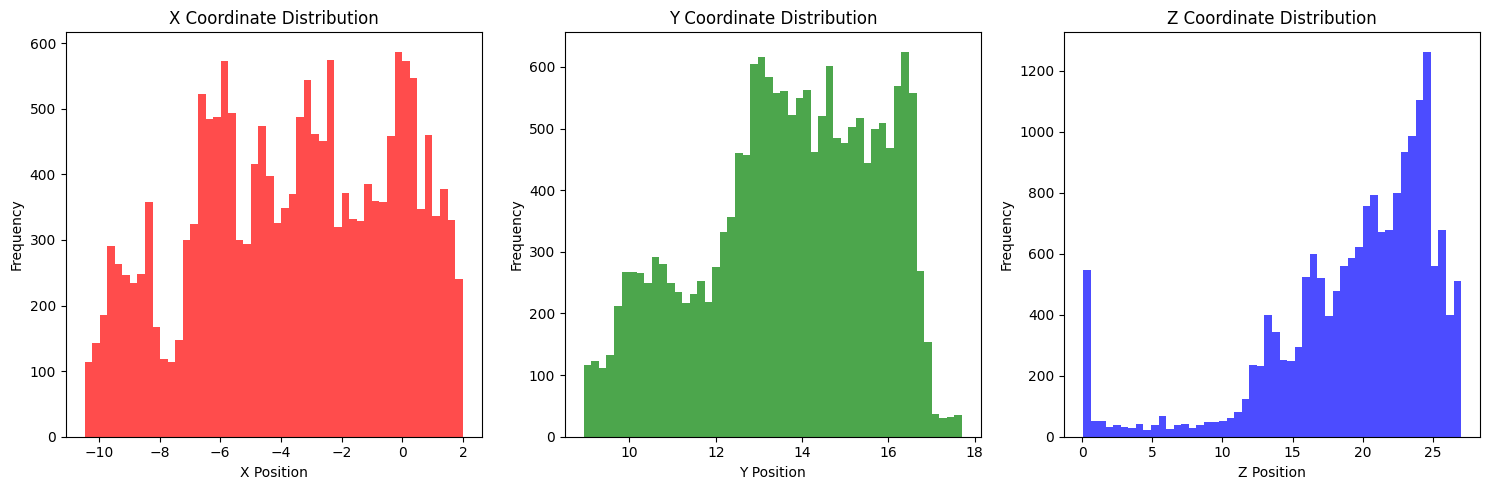

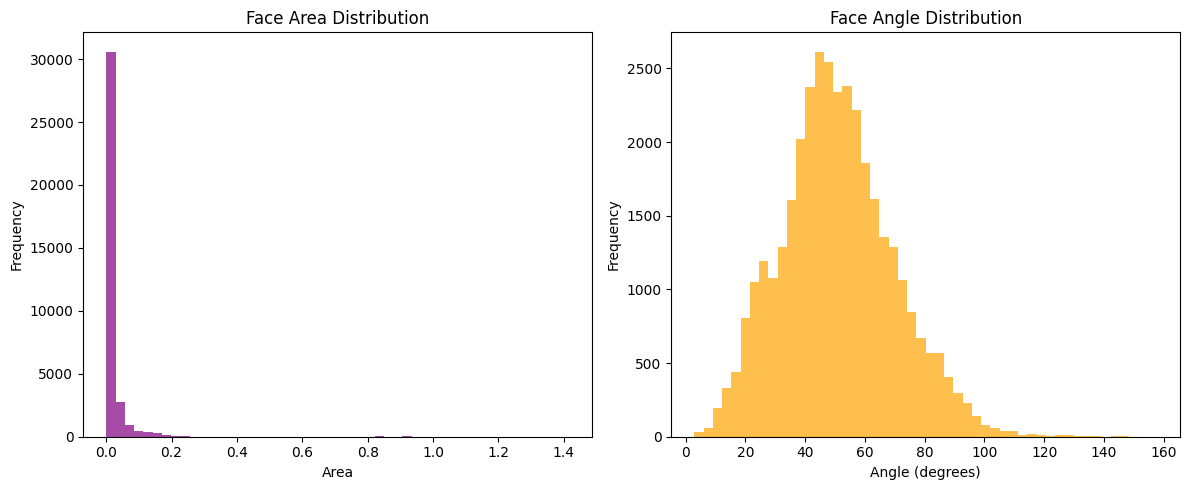

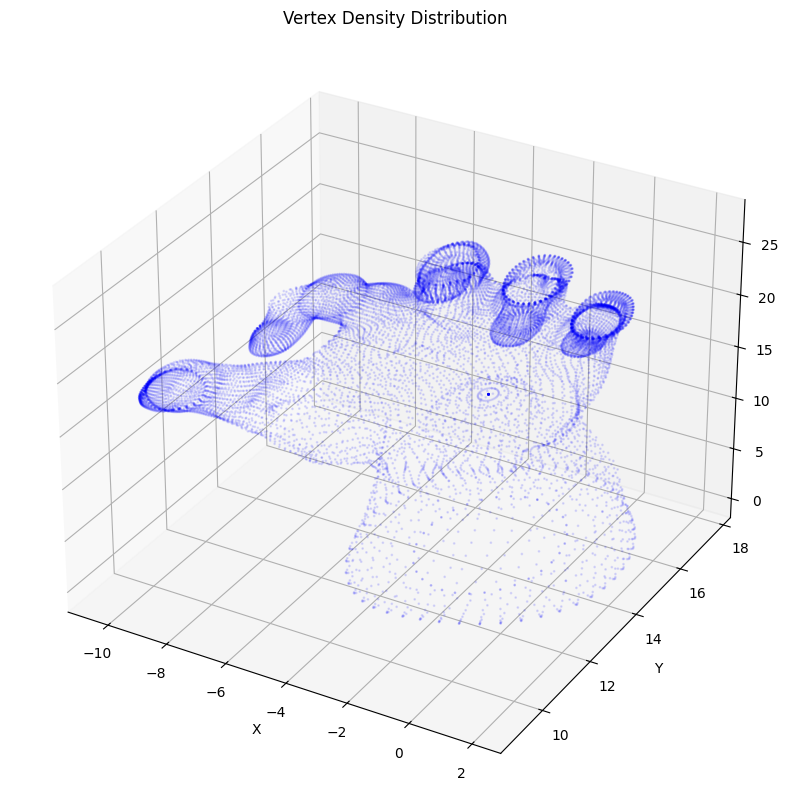

In [ ]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class ModelAnalyzer:
    def __init__(self, model_path):
        # Load the model, and if it's a scene, get the first mesh
        loaded_object = trimesh.load(model_path)
        if isinstance(loaded_object, trimesh.Scene):
            # Assume the first mesh in the scene is the main object
            self.mesh = loaded_object.geometry[list(loaded_object.geometry.keys())[0]]
        else:
            self.mesh = loaded_object

    def plot_vertex_histograms(self):
        """Plot histograms of vertex coordinates"""
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

        # X coordinates histogram
        ax1.hist(self.mesh.vertices[:, 0], bins=50, color='red', alpha=0.7)
        ax1.set_title('X Coordinate Distribution')
        ax1.set_xlabel('X Position')
        ax1.set_ylabel('Frequency')

        # Y coordinates histogram
        ax2.hist(self.mesh.vertices[:, 1], bins=50, color='green', alpha=0.7)
        ax2.set_title('Y Coordinate Distribution')
        ax2.set_xlabel('Y Position')
        ax2.set_ylabel('Frequency')

        # Z coordinates histogram
        ax3.hist(self.mesh.vertices[:, 2], bins=50, color='blue', alpha=0.7)
        ax3.set_title('Z Coordinate Distribution')
        ax3.set_xlabel('Z Position')
        ax3.set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    def plot_face_properties(self):
        """Plot histograms of face properties"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        # Calculate face areas
        face_areas = self.mesh.area_faces

        # Calculate face angles
        angles = []
        for face in self.mesh.faces:
            vertices = self.mesh.vertices[face]
            # Calculate vectors
            v1 = vertices[1] - vertices[0]
            v2 = vertices[2] - vertices[0]
            # Calculate angle
            angle = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
            angles.append(np.degrees(angle))

        # Plot histograms
        ax1.hist(face_areas, bins=50, color='purple', alpha=0.7)
        ax1.set_title('Face Area Distribution')
        ax1.set_xlabel('Area')
        ax1.set_ylabel('Frequency')

        ax2.hist(angles, bins=50, color='orange', alpha=0.7)
        ax2.set_title('Face Angle Distribution')
        ax2.set_xlabel('Angle (degrees)')
        ax2.set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    def plot_vertex_density(self):
        """Create a 3D scatter plot showing vertex density"""
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')

        # Plot vertices
        vertices = self.mesh.vertices
        ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],
                  c='blue', alpha=0.1, s=1)

        ax.set_title('Vertex Density Distribution')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        plt.show()

    def print_model_stats(self):
        """Print basic statistics about the model"""
        print("\n=== Model Statistics ===")
        print(f"Number of vertices: {len(self.mesh.vertices)}")
        print(f"Number of faces: {len(self.mesh.faces)}")
        print(f"Total surface area: {self.mesh.area:.2f}")
        print(f"Volume: {self.mesh.volume:.2f}")
        print(f"Is watertight: {self.mesh.is_watertight}")
        print(f"Is oriented: {self.mesh.is_winding_consistent}")

        # Calculate bounding box dimensions
        bounds = np.ptp(self.mesh.vertices, axis=0)
        print("\nBounding Box Dimensions:")
        print(f"X: {bounds[0]:.2f}")
        print(f"Y: {bounds[1]:.2f}")
        print(f"Z: {bounds[2]:.2f}")

def main():
    # Replace 'model.obj' with your 3D model file
    analyzer = ModelAnalyzer('/content/drive/MyDrive/OutputPaper2/15807_Zombie_Hand_v1_NEW.obj')

    # Print basic statistics
    analyzer.print_model_stats()

    # Generate and display all histograms
    analyzer.plot_vertex_histograms()
    analyzer.plot_face_properties()
    analyzer.plot_vertex_density()

if __name__ == "__main__":
    main()


=== Model Statistics ===
Number of vertices: 49098
Number of faces: 97984
Total surface area: 542.97
Volume: 306.96
Is watertight: False
Is oriented: True

Bounding Box Dimensions:
X: 11.28
Y: 7.91
Z: 20.37


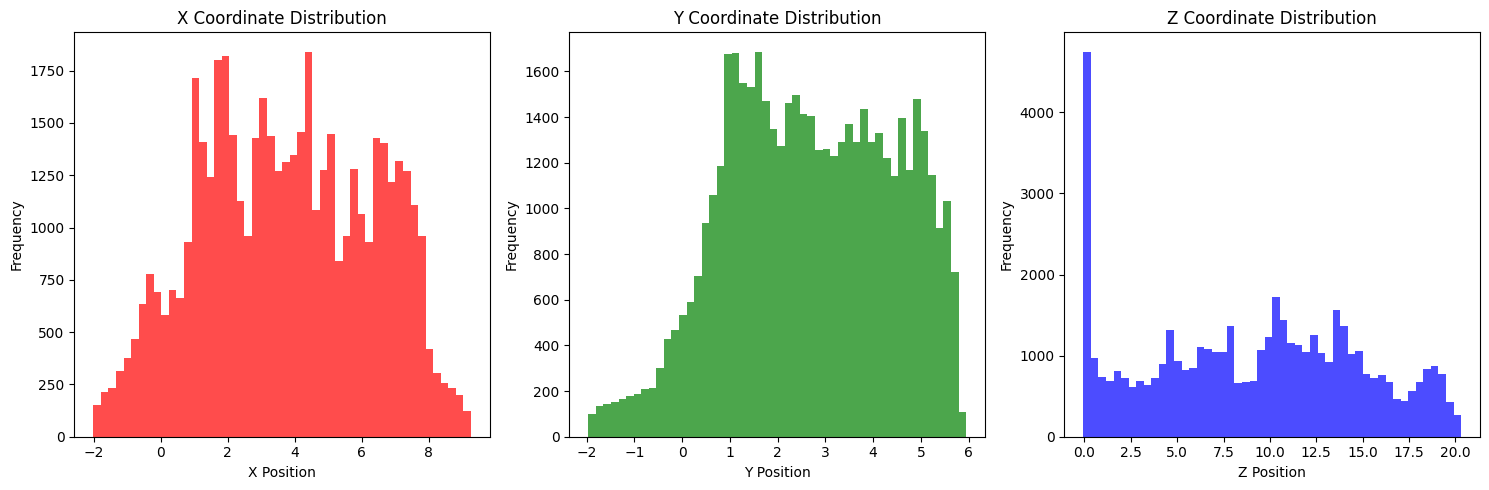

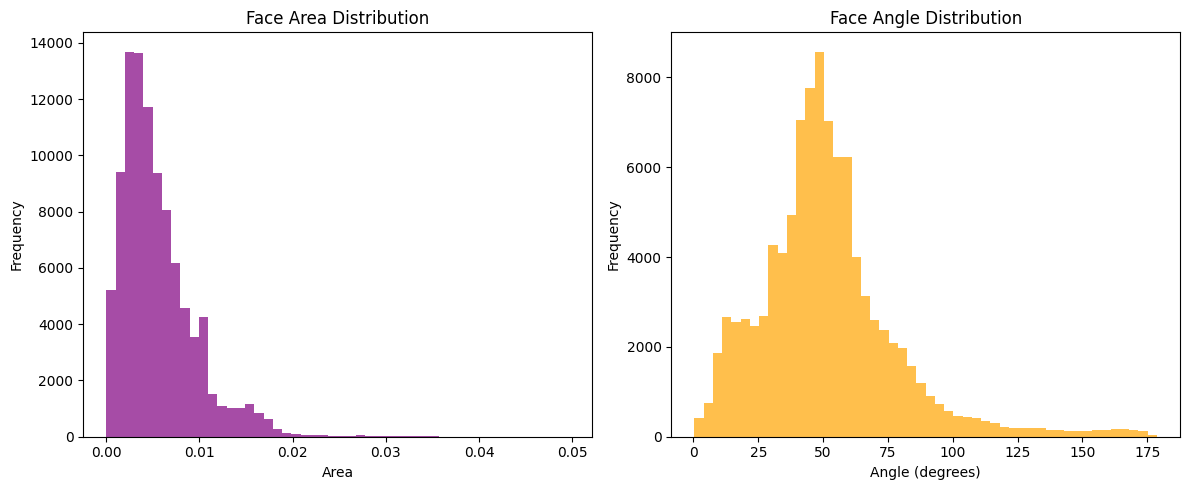

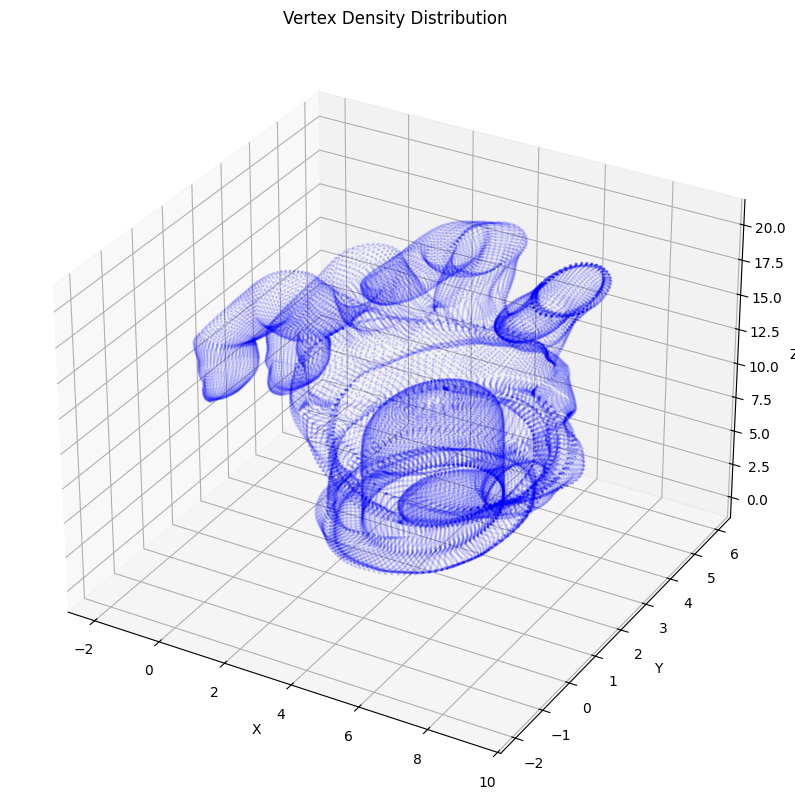

In [ ]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class ModelAnalyzer:
    def __init__(self, model_path):
        # Load the model, and if it's a scene, get the first mesh
        loaded_object = trimesh.load(model_path)
        if isinstance(loaded_object, trimesh.Scene):
            # Assume the first mesh in the scene is the main object
            self.mesh = loaded_object.geometry[list(loaded_object.geometry.keys())[0]]
        else:
            self.mesh = loaded_object

    def plot_vertex_histograms(self):
        """Plot histograms of vertex coordinates"""
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

        # X coordinates histogram
        ax1.hist(self.mesh.vertices[:, 0], bins=50, color='red', alpha=0.7)
        ax1.set_title('X Coordinate Distribution')
        ax1.set_xlabel('X Position')
        ax1.set_ylabel('Frequency')

        # Y coordinates histogram
        ax2.hist(self.mesh.vertices[:, 1], bins=50, color='green', alpha=0.7)
        ax2.set_title('Y Coordinate Distribution')
        ax2.set_xlabel('Y Position')
        ax2.set_ylabel('Frequency')

        # Z coordinates histogram
        ax3.hist(self.mesh.vertices[:, 2], bins=50, color='blue', alpha=0.7)
        ax3.set_title('Z Coordinate Distribution')
        ax3.set_xlabel('Z Position')
        ax3.set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    def plot_face_properties(self):
        """Plot histograms of face properties"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        # Calculate face areas
        face_areas = self.mesh.area_faces

        # Calculate face angles
        angles = []
        for face in self.mesh.faces:
            vertices = self.mesh.vertices[face]
            # Calculate vectors
            v1 = vertices[1] - vertices[0]
            v2 = vertices[2] - vertices[0]
            # Calculate angle
            angle = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
            angles.append(np.degrees(angle))

        # Plot histograms
        ax1.hist(face_areas, bins=50, color='purple', alpha=0.7)
        ax1.set_title('Face Area Distribution')
        ax1.set_xlabel('Area')
        ax1.set_ylabel('Frequency')

        ax2.hist(angles, bins=50, color='orange', alpha=0.7)
        ax2.set_title('Face Angle Distribution')
        ax2.set_xlabel('Angle (degrees)')
        ax2.set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    def plot_vertex_density(self):
        """Create a 3D scatter plot showing vertex density"""
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')

        # Plot vertices
        vertices = self.mesh.vertices
        ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],
                  c='blue', alpha=0.1, s=1)

        ax.set_title('Vertex Density Distribution')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        plt.show()

    def print_model_stats(self):
        """Print basic statistics about the model"""
        print("\n=== Model Statistics ===")
        print(f"Number of vertices: {len(self.mesh.vertices)}")
        print(f"Number of faces: {len(self.mesh.faces)}")
        print(f"Total surface area: {self.mesh.area:.2f}")
        print(f"Volume: {self.mesh.volume:.2f}")
        print(f"Is watertight: {self.mesh.is_watertight}")
        print(f"Is oriented: {self.mesh.is_winding_consistent}")

        # Calculate bounding box dimensions
        bounds = np.ptp(self.mesh.vertices, axis=0)
        print("\nBounding Box Dimensions:")
        print(f"X: {bounds[0]:.2f}")
        print(f"Y: {bounds[1]:.2f}")
        print(f"Z: {bounds[2]:.2f}")

def main():
    # Replace 'model.obj' with your 3D model file
    analyzer = ModelAnalyzer('/content/drive/MyDrive/OutputPaper2/15800_Mummy_Hand_v1_NEW.obj')

    # Print basic statistics
    analyzer.print_model_stats()

    # Generate and display all histograms
    analyzer.plot_vertex_histograms()
    analyzer.plot_face_properties()
    analyzer.plot_vertex_density()

if __name__ == "__main__":
    main()


=== Model Statistics ===
Number of vertices: 37472
Number of faces: 74770
Total surface area: 673.32
Volume: 666.93
Is watertight: False
Is oriented: True

Bounding Box Dimensions:
X: 11.34
Y: 23.73
Z: 21.14


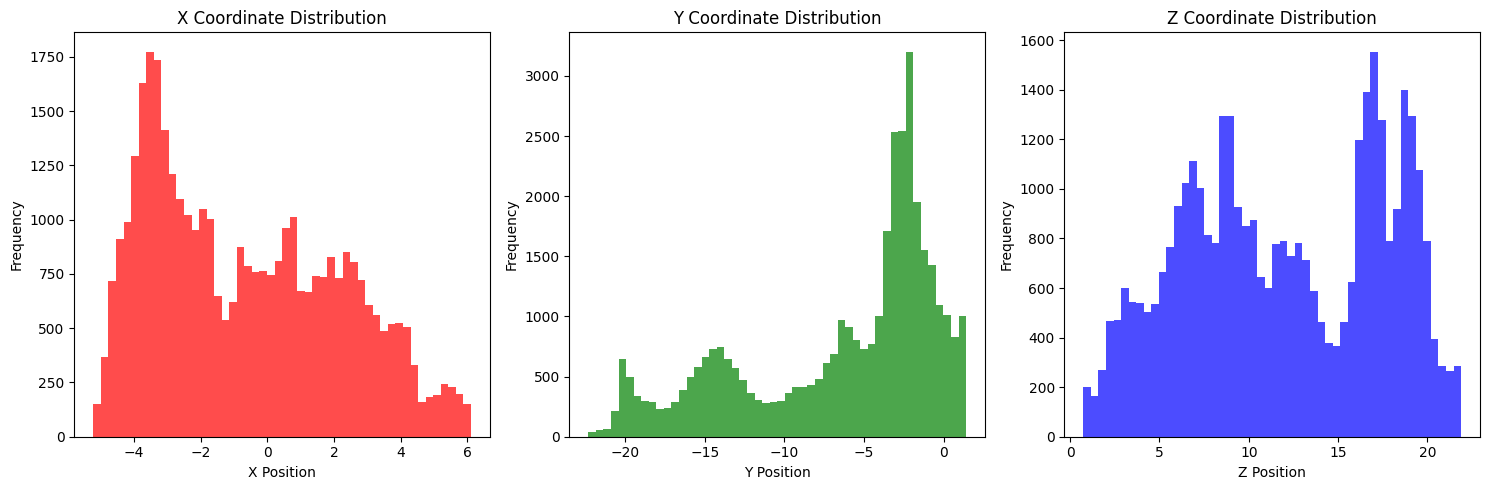

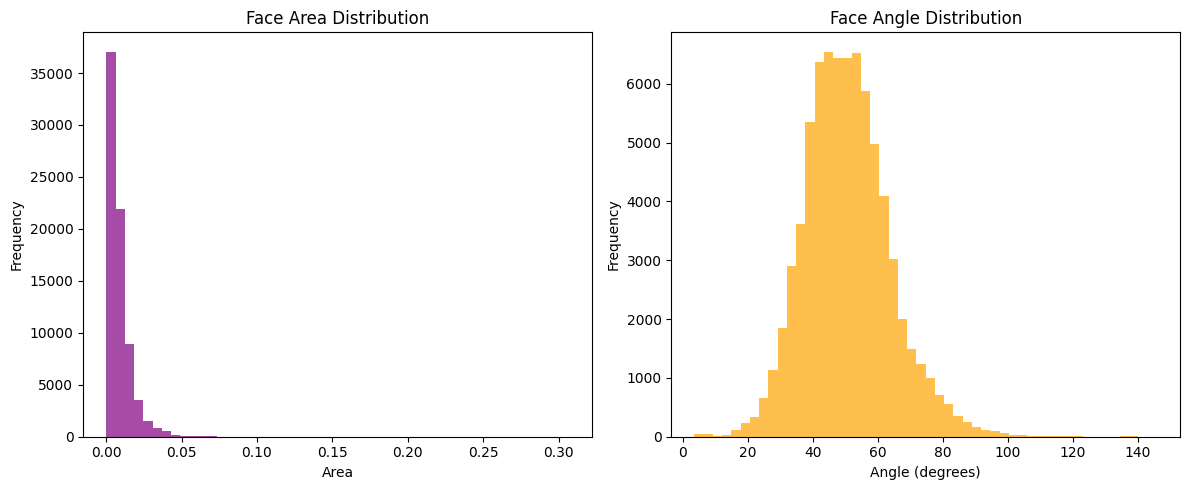

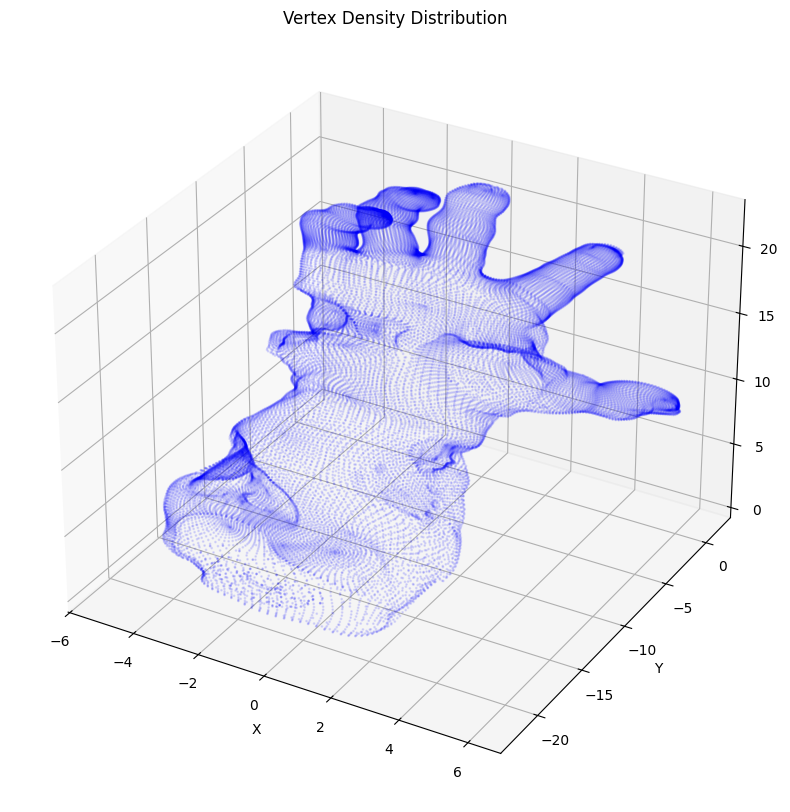

In [ ]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class ModelAnalyzer:
    def __init__(self, model_path):
        # Load the model, and if it's a scene, get the first mesh
        loaded_object = trimesh.load(model_path)
        if isinstance(loaded_object, trimesh.Scene):
            # Assume the first mesh in the scene is the main object
            self.mesh = loaded_object.geometry[list(loaded_object.geometry.keys())[0]]
        else:
            self.mesh = loaded_object

    def plot_vertex_histograms(self):
        """Plot histograms of vertex coordinates"""
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

        # X coordinates histogram
        ax1.hist(self.mesh.vertices[:, 0], bins=50, color='red', alpha=0.7)
        ax1.set_title('X Coordinate Distribution')
        ax1.set_xlabel('X Position')
        ax1.set_ylabel('Frequency')

        # Y coordinates histogram
        ax2.hist(self.mesh.vertices[:, 1], bins=50, color='green', alpha=0.7)
        ax2.set_title('Y Coordinate Distribution')
        ax2.set_xlabel('Y Position')
        ax2.set_ylabel('Frequency')

        # Z coordinates histogram
        ax3.hist(self.mesh.vertices[:, 2], bins=50, color='blue', alpha=0.7)
        ax3.set_title('Z Coordinate Distribution')
        ax3.set_xlabel('Z Position')
        ax3.set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    def plot_face_properties(self):
        """Plot histograms of face properties"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        # Calculate face areas
        face_areas = self.mesh.area_faces

        # Calculate face angles
        angles = []
        for face in self.mesh.faces:
            vertices = self.mesh.vertices[face]
            # Calculate vectors
            v1 = vertices[1] - vertices[0]
            v2 = vertices[2] - vertices[0]
            # Calculate angle
            angle = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
            angles.append(np.degrees(angle))

        # Plot histograms
        ax1.hist(face_areas, bins=50, color='purple', alpha=0.7)
        ax1.set_title('Face Area Distribution')
        ax1.set_xlabel('Area')
        ax1.set_ylabel('Frequency')

        ax2.hist(angles, bins=50, color='orange', alpha=0.7)
        ax2.set_title('Face Angle Distribution')
        ax2.set_xlabel('Angle (degrees)')
        ax2.set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    def plot_vertex_density(self):
        """Create a 3D scatter plot showing vertex density"""
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')

        # Plot vertices
        vertices = self.mesh.vertices
        ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],
                  c='blue', alpha=0.1, s=1)

        ax.set_title('Vertex Density Distribution')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        plt.show()

    def print_model_stats(self):
        """Print basic statistics about the model"""
        print("\n=== Model Statistics ===")
        print(f"Number of vertices: {len(self.mesh.vertices)}")
        print(f"Number of faces: {len(self.mesh.faces)}")
        print(f"Total surface area: {self.mesh.area:.2f}")
        print(f"Volume: {self.mesh.volume:.2f}")
        print(f"Is watertight: {self.mesh.is_watertight}")
        print(f"Is oriented: {self.mesh.is_winding_consistent}")

        # Calculate bounding box dimensions
        bounds = np.ptp(self.mesh.vertices, axis=0)
        print("\nBounding Box Dimensions:")
        print(f"X: {bounds[0]:.2f}")
        print(f"Y: {bounds[1]:.2f}")
        print(f"Z: {bounds[2]:.2f}")

def main():
    # Replace 'model.obj' with your 3D model file
    analyzer = ModelAnalyzer('/content/drive/MyDrive/OutputPaper2/15742_Zombie_Arm_v1.obj')

    # Print basic statistics
    analyzer.print_model_stats()

    # Generate and display all histograms
    analyzer.plot_vertex_histograms()
    analyzer.plot_face_properties()
    analyzer.plot_vertex_density()

if __name__ == "__main__":
    main()


=== Model Statistics ===
Number of vertices: 66143
Number of faces: 131510
Total surface area: 335.20
Volume: 57.50
Is watertight: False
Is oriented: True

Bounding Box Dimensions:
X: 16.94
Y: 6.83
Z: 10.58


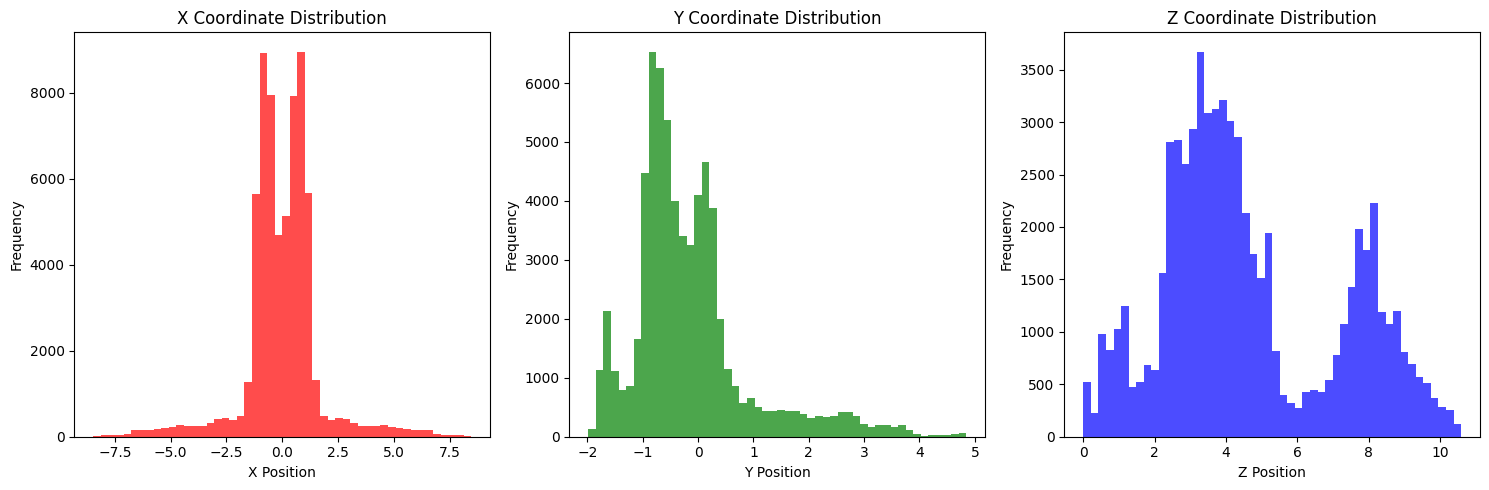

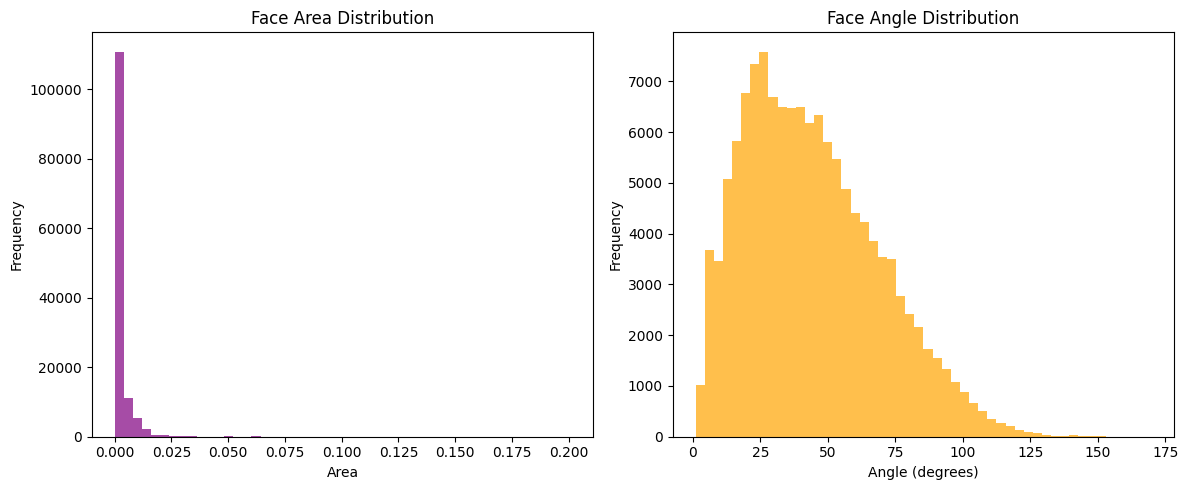

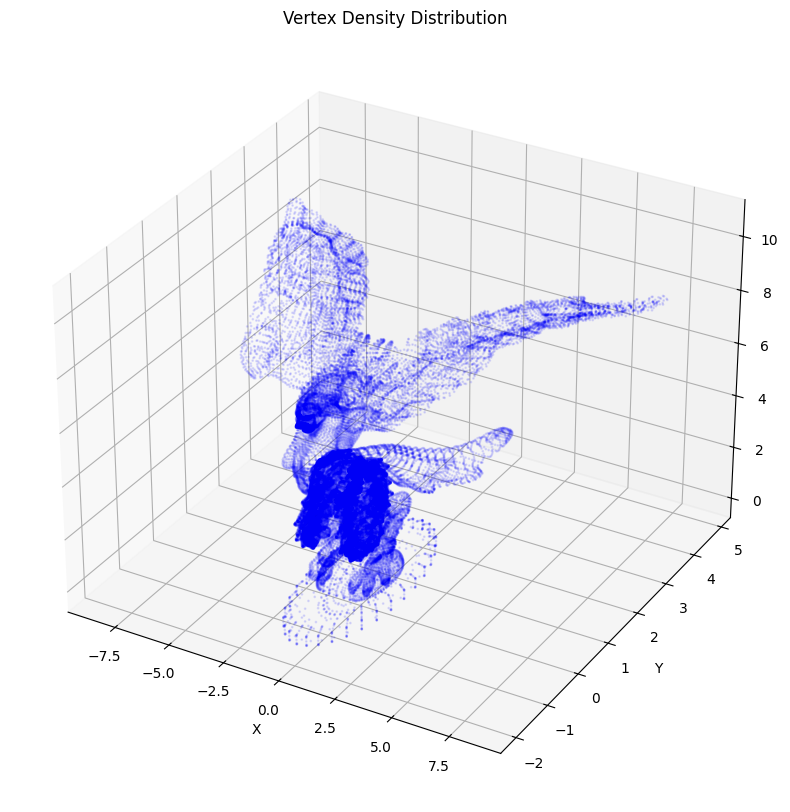

In [ ]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class ModelAnalyzer:
    def __init__(self, model_path):
        # Load the model, and if it's a scene, get the first mesh
        loaded_object = trimesh.load(model_path)
        if isinstance(loaded_object, trimesh.Scene):
            # Assume the first mesh in the scene is the main object
            self.mesh = loaded_object.geometry[list(loaded_object.geometry.keys())[0]]
        else:
            self.mesh = loaded_object

    def plot_vertex_histograms(self):
        """Plot histograms of vertex coordinates"""
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

        # X coordinates histogram
        ax1.hist(self.mesh.vertices[:, 0], bins=50, color='red', alpha=0.7)
        ax1.set_title('X Coordinate Distribution')
        ax1.set_xlabel('X Position')
        ax1.set_ylabel('Frequency')

        # Y coordinates histogram
        ax2.hist(self.mesh.vertices[:, 1], bins=50, color='green', alpha=0.7)
        ax2.set_title('Y Coordinate Distribution')
        ax2.set_xlabel('Y Position')
        ax2.set_ylabel('Frequency')

        # Z coordinates histogram
        ax3.hist(self.mesh.vertices[:, 2], bins=50, color='blue', alpha=0.7)
        ax3.set_title('Z Coordinate Distribution')
        ax3.set_xlabel('Z Position')
        ax3.set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    def plot_face_properties(self):
        """Plot histograms of face properties"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        # Calculate face areas
        face_areas = self.mesh.area_faces

        # Calculate face angles
        angles = []
        for face in self.mesh.faces:
            vertices = self.mesh.vertices[face]
            # Calculate vectors
            v1 = vertices[1] - vertices[0]
            v2 = vertices[2] - vertices[0]
            # Calculate angle
            angle = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
            angles.append(np.degrees(angle))

        # Plot histograms
        ax1.hist(face_areas, bins=50, color='purple', alpha=0.7)
        ax1.set_title('Face Area Distribution')
        ax1.set_xlabel('Area')
        ax1.set_ylabel('Frequency')

        ax2.hist(angles, bins=50, color='orange', alpha=0.7)
        ax2.set_title('Face Angle Distribution')
        ax2.set_xlabel('Angle (degrees)')
        ax2.set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    def plot_vertex_density(self):
        """Create a 3D scatter plot showing vertex density"""
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')

        # Plot vertices
        vertices = self.mesh.vertices
        ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],
                  c='blue', alpha=0.1, s=1)

        ax.set_title('Vertex Density Distribution')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        plt.show()

    def print_model_stats(self):
        """Print basic statistics about the model"""
        print("\n=== Model Statistics ===")
        print(f"Number of vertices: {len(self.mesh.vertices)}")
        print(f"Number of faces: {len(self.mesh.faces)}")
        print(f"Total surface area: {self.mesh.area:.2f}")
        print(f"Volume: {self.mesh.volume:.2f}")
        print(f"Is watertight: {self.mesh.is_watertight}")
        print(f"Is oriented: {self.mesh.is_winding_consistent}")

        # Calculate bounding box dimensions
        bounds = np.ptp(self.mesh.vertices, axis=0)
        print("\nBounding Box Dimensions:")
        print(f"X: {bounds[0]:.2f}")
        print(f"Y: {bounds[1]:.2f}")
        print(f"Z: {bounds[2]:.2f}")

def main():
    # Replace 'model.obj' with your 3D model file
    analyzer = ModelAnalyzer('/content/drive/MyDrive/OutputPaper2/16794_Harpy_V1.obj')

    # Print basic statistics
    analyzer.print_model_stats()

    # Generate and display all histograms
    analyzer.plot_vertex_histograms()
    analyzer.plot_face_properties()
    analyzer.plot_vertex_density()

if __name__ == "__main__":
    main()

In [ ]:
!pip install trimesh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 707.0/707.0 kB 15.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
from scipy import stats

def load_obj(file_path):
    """
    Load vertices from an OBJ file.

    Parameters:
    file_path: str
        Path to the OBJ file

    Returns:
    numpy.ndarray: Array of vertices (x, y, z coordinates)
    """
    vertices = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('v '):  # vertex data
                coords = line.strip().split()[1:]
                vertex = [float(x) for x in coords]
                vertices.append(vertex)
    return np.array(vertices)

def calculate_correlation(original_path, stego_path):
    """
    Calculate correlation coefficients between original and stego 3D models.

    Parameters:
    original_path: str
        Path to the original OBJ file
    stego_path: str
        Path to the stego OBJ file

    Returns:
    dict: Dictionary containing correlation coefficients and additional metrics
    """
    # Load vertices from both models
    original_vertices = load_obj(original_path)
    stego_vertices = load_obj(stego_path)

    if original_vertices.shape != stego_vertices.shape:
        raise ValueError("Models must have the same number of vertices")

    # Calculate correlation coefficients for each coordinate (x, y, z)
    correlations = {
        'x': stats.pearsonr(original_vertices[:, 0], stego_vertices[:, 0])[0],
        'y': stats.pearsonr(original_vertices[:, 1], stego_vertices[:, 1])[0],
        'z': stats.pearsonr(original_vertices[:, 2], stego_vertices[:, 2])[0]
    }

    # Calculate overall correlation (using all coordinates)
    overall_corr = stats.pearsonr(original_vertices.flatten(), stego_vertices.flatten())[0]

    # Calculate additional metrics
    mse = np.mean((original_vertices - stego_vertices) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(original_vertices - stego_vertices))

    # Calculate vertex-wise Euclidean distances
    distances = np.sqrt(np.sum((original_vertices - stego_vertices) ** 2, axis=1))
    max_distance = np.max(distances)
    mean_distance = np.mean(distances)

    return {
        'correlation_coefficients': correlations,
        'overall_correlation': overall_corr,
        'mean_squared_error': mse,
        'root_mean_squared_error': rmse,
        'mean_absolute_error': mae,
        'max_vertex_distance': max_distance,
        'mean_vertex_distance': mean_distance
    }

def analyze_local_correlations(original_path, stego_path, window_size=100):
    """
    Analyze local correlations using sliding windows of vertices.

    Parameters:
    original_path: str
        Path to the original OBJ file
    stego_path: str
        Path to the stego OBJ file
    window_size: int
        Size of the sliding window for local analysis

    Returns:
    dict: Dictionary containing local correlation statistics
    """
    original_vertices = load_obj(original_path)
    stego_vertices = load_obj(stego_path)

    num_vertices = len(original_vertices)
    local_correlations = []

    # Analyze correlation in sliding windows
    for i in range(0, num_vertices - window_size + 1, window_size // 2):
        window_orig = original_vertices[i:i + window_size]
        window_stego = stego_vertices[i:i + window_size]

        local_corr = stats.pearsonr(window_orig.flatten(), window_stego.flatten())[0]
        local_correlations.append(local_corr)

    return {
        'min_local_correlation': np.min(local_correlations),
        'max_local_correlation': np.max(local_correlations),
        'mean_local_correlation': np.mean(local_correlations),
        'std_local_correlation': np.std(local_correlations)
    }

def print_analysis(results, local_results):
    """
    Print formatted analysis results.
    """
    print("\nCorrelation Analysis Results")
    print("-" * 50)
    print("\nPer-Coordinate Correlations:")
    for coord, corr in results['correlation_coefficients'].items():
        print(f"{coord}-coordinate: {corr:.4f}")

    print(f"\nOverall Correlation: {results['overall_correlation']:.4f}")
    print(f"Root Mean Squared Error: {results['root_mean_squared_error']:.6f}")
    print(f"Mean Absolute Error: {results['mean_absolute_error']:.6f}")
    print(f"Maximum Vertex Distance: {results['max_vertex_distance']:.6f}")
    print(f"Mean Vertex Distance: {results['mean_vertex_distance']:.6f}")

    print("\nLocal Correlation Analysis:")
    print(f"Minimum Local Correlation: {local_results['min_local_correlation']:.4f}")
    print(f"Maximum Local Correlation: {local_results['max_local_correlation']:.4f}")
    print(f"Mean Local Correlation: {local_results['mean_local_correlation']:.4f}")
    print(f"Std. Dev. of Local Correlations: {local_results['std_local_correlation']:.4f}")

def main():
    """
    Main function to run the correlation analysis.
    """
    try:
        # Replace these with your actual file paths
        original_path = "/content/drive/MyDrive/OutputPaper2/16794_Harpy_V1.obj"
        stego_path = "/content/drive/MyDrive/OutputPaper2/modified_16794_Harpy_V1.obj"

        # Calculate correlations and additional metrics
        results = calculate_correlation(original_path, stego_path)

        # Analyze local correlations
        local_results = analyze_local_correlations(original_path, stego_path)

        # Print results
        print_analysis(results, local_results)

    except Exception as e:
        print(f"Error: {str(e)}")
        print("\nPlease check that:")
        print("1. Both OBJ files exist and are readable")
        print("2. Both models have the same number of vertices")
        print("3. File paths are correctly specified")

if __name__ == "__main__":
    main()


Correlation Analysis Results
--------------------------------------------------

Per-Coordinate Correlations:
x-coordinate: 1.0000
y-coordinate: 1.0000
z-coordinate: 1.0000

Overall Correlation: 1.0000
Root Mean Squared Error: 0.000032
Mean Absolute Error: 0.000001
Maximum Vertex Distance: 0.000998
Mean Vertex Distance: 0.000003

Local Correlation Analysis:
Minimum Local Correlation: 1.0000
Maximum Local Correlation: 1.0000
Mean Local Correlation: 1.0000
Std. Dev. of Local Correlations: 0.0000
